In [9]:
!nvidia-smi

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Tue Sep 24 03:21:28 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PB5yLOeXhSqUxpeloU8u")
project = rf.workspace("driver-wlf6m").project("glasses-bg6oe")
version = project.version(2)
dataset = version.download("folder")
                

loading Roboflow workspace...
loading Roboflow project...


In [11]:
import os
import zipfile

train_horse_dir = os.path.join('/kaggle/working/glasses-2/train/glasses')
train_human_dir = os.path.join('/kaggle/working/glasses-2/train/no_glasses')


validation_horse_dir = os.path.join('/kaggle/working/glasses-2/valid/glasses')
validation_human_dir = os.path.join('/kaggle/working/glasses-2/valid/no_glasses')

In [12]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['face-1272_jpg.rf.e5e644d1986e1dd84d175c0a89e04a96.jpg', 'face-2269_jpg.rf.29b3b4586d006bf3e7a767cb51bccf39.jpg', 'face-430_jpg.rf.eed8fa480b5151e05098720730c4ddef.jpg', 'face-1500_jpg.rf.d8643d9a302e32f94bdbabe0e7f4020f.jpg', 'face-4877_jpg.rf.6674e4cc7960b356c8061e67b05f6579.jpg', 'face-1981_jpg.rf.8d436cb2b7da73b2224c260169cae6c8.jpg', 'face-3399_jpg.rf.41a5cc3c89d7f200f8deea9659720903.jpg', 'face-4845_jpg.rf.ad64f482bb26cae2f5643737a238517b.jpg', 'face-4515_jpg.rf.639fefea959be8d55b89c2909041588f.jpg', 'face-1446_jpg.rf.e8faf79217d2792ea59e99468a25b4ca.jpg']
['face-1235_jpg.rf.e333659d0de47ebcf7cdecb649e57da8.jpg', 'face-2757_jpg.rf.55bf8d3ac8fb4e005b9b00ddbda87a89.jpg', 'face-4122_jpg.rf.569fc0ec3a43dfb16321fe5cfa5187eb.jpg', 'face-1628_jpg.rf.d53e1707fd5be06635413eb4e867c259.jpg', 'face-3072_jpg.rf.cd6f7f0f61a7a8e07bc97856eef87ff7.jpg', 'face-702_jpg.rf.be7873ab24aa0df3d13267ef7ba7a15a.jpg', 'face-254_jpg.rf.53cea9cb5661c46537da9346610d7399.jpg', 'face-2880_jpg.rf.6ef2daf00cb05b

In [13]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 1938
total training human images: 1506
total validation horse images: 554
total validation human images: 430


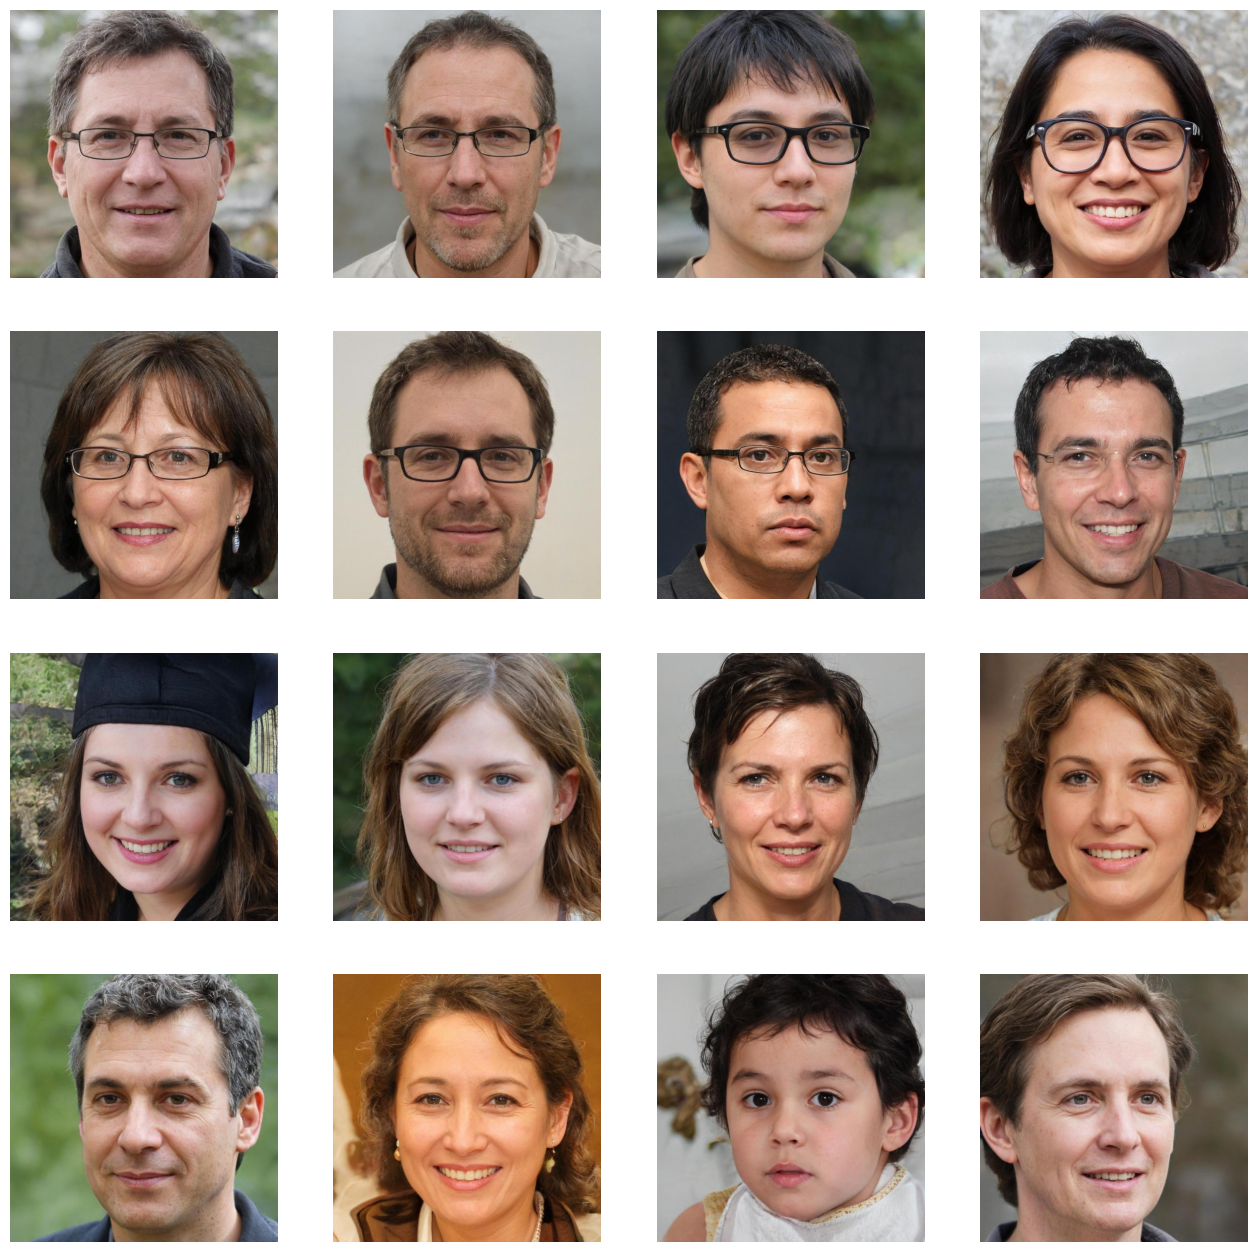

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [23]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])



In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/kaggle/working/glasses-2/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/kaggle/working/glasses-2/valid',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 3444 images belonging to 2 classes.
Found 984 images belonging to 2 classes.


In [39]:

# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=8,  
#       epochs=10,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

history = model.fit(
      train_generator,

      epochs=10,
      verbose=1,
      validation_data=validation_generator,
      )



Epoch 1/10


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
I0000 00:00:1727149056.864459     231 service.cc:145] XLA service 0x5ac109773fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727149056.864519     231 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727149056.864524     231 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/27 ━━━━━━━━━━━━━━━━━━━━ 9:38 22s/step - acc: 0.3906 - loss: 0.6951

I0000 00:00:1727149072.837406     231 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - acc: 0.5717 - loss: 0.6703 - val_acc: 0.9085 - val_loss: 0.2117
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 587ms/step - acc: 0.9550 - loss: 0.1176 - val_acc: 0.9959 - val_loss: 0.0165
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 590ms/step - acc: 0.9970 - loss: 0.0122 - val_acc: 0.9980 - val_loss: 0.0052
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 594ms/step - acc: 0.9988 - loss: 0.0058 - val_acc: 0.9980 - val_loss: 0.0063
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 587ms/step - acc: 0.9981 - loss: 0.0062 - val_acc: 0.9980 - val_loss: 0.0032
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 601ms/step - acc: 0.9980 - loss: 0.0053 - val_acc: 0.9980 - val_loss: 0.0051
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 584ms/step - acc: 0.9996 - loss: 0.0013 - val_acc: 0.9990 - val_loss: 0.0019
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 591ms/step - acc: 0.9996 - loss: 0.0022 - val_acc: 0.9990 - val_loss: 0.0013
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 590ms/step - acc: 0.

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image

# Define the path to your test images
test_directory = '/kaggle/working/glasses-2/test'

# Create an ImageDataGenerator for rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directory
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(300, 300),  # Adjust based on your model's input size
    batch_size=1,  # We can use batch_size=1 for single predictions
    class_mode=None,  # No labels in the test set
    shuffle=False  # Important to keep the order of images for predictions
)

# Make predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert probabilities to class labels (assuming binary classification)
predicted_classes = (predictions > 0.5).astype("int32")  # Change the threshold if necessary

# Display results
for i, filename in enumerate(test_generator.filenames):
    print(f"Image: {os.path.basename(filename)}, Prediction: {'Glasses' if predicted_classes[i] == 1 else 'No Glasses'}")


Found 492 images belonging to 2 classes.
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Image: face-1006_jpg.rf.a5766c8752d40f2f96438025e0b51f67.jpg, Prediction: No Glasses
Image: face-1008_jpg.rf.0d1ac0a9996d32dbecf0c9ad0a56cc3d.jpg, Prediction: No Glasses
Image: face-1012_jpg.rf.f3fae97c3f07ad0d91973f7a16d926e1.jpg, Prediction: No Glasses
Image: face-1014_jpg.rf.77e29627d174d3f77847fadb1ff55080.jpg, Prediction: No Glasses
Image: face-101_jpg.rf.5c7aa9f5da616d18aa0626b0e8890ac4.jpg, Prediction: No Glasses
Image: face-1034_jpg.rf.06161976a0a6465bfff9553689813f00.jpg, Prediction: No Glasses
Image: face-1071_jpg.rf.7c41ff86c781db40daf49ecba608273c.jpg, Prediction: No Glasses
Image: face-1076_jpg.rf.97ac8411b133612bcfc217d914c9be8a.jpg, Prediction: No Glasses
Image: face-1086_jpg.rf.65ea0ac12cefa1d8bde92a78a0df9797.jpg, Prediction: No Glasses
Image: face-1087_jpg.rf.e99d1421db9617b29efb8dcf407a91a4.jpg, Prediction: No Glasses
Image: face-1115_jpg.rf.fe1f2453c1fa5ba1a9f5952f86f6a08c.jpg, Predict

Found 492 images belonging to 2 classes.
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


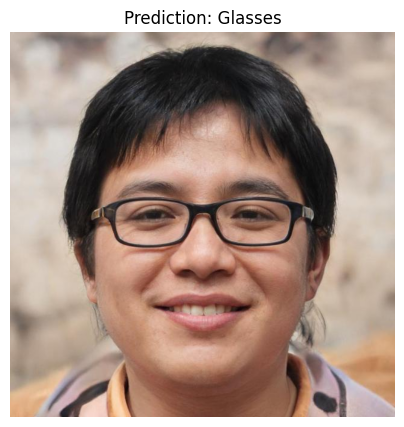

In [61]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your test images
test_directory = '/kaggle/working/glasses-2/test'

# Create an ImageDataGenerator for rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directory
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(300, 300),  # Adjust based on your model's input size
    batch_size=1,  # We can use batch_size=1 for single predictions
    class_mode=None,  # No labels in the test set
    shuffle=False  # Important to keep the order of images for predictions
)

# Make predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert probabilities to class labels (assuming binary classification)
predicted_classes = (predictions > 0.5).astype("int32")  # Change the threshold if necessary

# Select a random image from the predictions
random_index = random.randint(0, len(test_generator.filenames) - 1)
random_image_path = os.path.join(test_directory, test_generator.filenames[random_index])

# Load the random image using PIL for displaying
random_image = Image.open(random_image_path)

# Display the random image and its prediction
plt.figure(figsize=(5, 5))
plt.imshow(random_image)
plt.title(f"Prediction: {'No Glasses' if predicted_classes[random_index] == 1 else 'Glasses'}")
plt.axis("off")  # Hide the axis
plt.show()


In [57]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,112,293 (19.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,408,196 (13.00 MB)

In [62]:
model.save('glasses_no_glasses.h5')

In [ ]:
import tensorflow as tf
import shutil

# Step 1: Load the Keras model
model = tf.keras.models.load_model('glasses_no_glasses.h5')

# Step 2: Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Step 3: Save the TFLite model to a file
tflite_model_file = 'my_model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

# Step 4: Move the TFLite model to a location that can be downloaded
shutil.move(tflite_model_file, '/kaggle/working/my_model.tflite')
